## Max Wagner
## Module 4 - Data 608

***

### Read in the data, get a few basic properties about it

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/jlaurito/CUNY_IS608/master/lecture4/data/riverkeeper_data_2013.csv"
riverkeeper = pd.read_csv(url)

In [3]:
riverkeeper.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


In [4]:
riverkeeper.dtypes

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

### Looks like the *EnteroCount*  and *Date* columns are objects, they should be numerics.

In [5]:
# the coerce removes NaN values if they exist for some reason
riverkeeper['EnteroCount'] = pd.to_numeric(riverkeeper['EnteroCount'], errors='coerce')
riverkeeper['Date'] =  pd.to_datetime(riverkeeper['Date'], format='%m/%d/%Y')

In [6]:
riverkeeper.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                float64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

### 1. Find the best and worst places to swim based on the *EnteroCount* column.

In [7]:
rf_ent = riverkeeper[['Site', 'EnteroCount']]
rf_group = rf_ent.groupby('Site')
rf_best = rf_group.mean().sort_values(by = 'EnteroCount').head(10) # best
rf_worst = rf_group.mean().sort_values(by = 'EnteroCount', ascending = False).head(10) # worst

In [8]:
rf_best

,EnteroCount
Site,
Poughkeepsie Drinking Water Intake,9.454545
Marlboro Landing,16.470588
Poughkeepsie Launch Ramp,17.675676
Little Stony Point,20.030303
Croton Point Beach,20.480000
Fort Montgomery,22.117647
Cold Spring Harbor,23.176471
Stony Point mid-channel,23.458333
West Point STP Outfall,26.875000


In [9]:
rf_worst

,EnteroCount
Site,
Gowanus Canal,1384.120000
Saw Mill River,1055.695652
Upper Sparkill Creek,818.601399
Kingsland Pt. Park- Pocantico River,573.500000
Piermont Pier,545.121212
Newtown Creek- Metropolitan Ave. Bridge,537.302326
Newtown Creek- Dutch Kills,529.684211
Tarrytown Marina,529.571429
Mohawk River at Waterford,512.030303


In [10]:
# group by does something odd, so write and read to csv to fix it
rf_means = rf_group.mean().sort_values(by = 'EnteroCount')
rf_means.to_csv('entero.csv')
rf_means = pd.read_csv('entero.csv')
rf_means.columns = ['Site','EnteroCount']

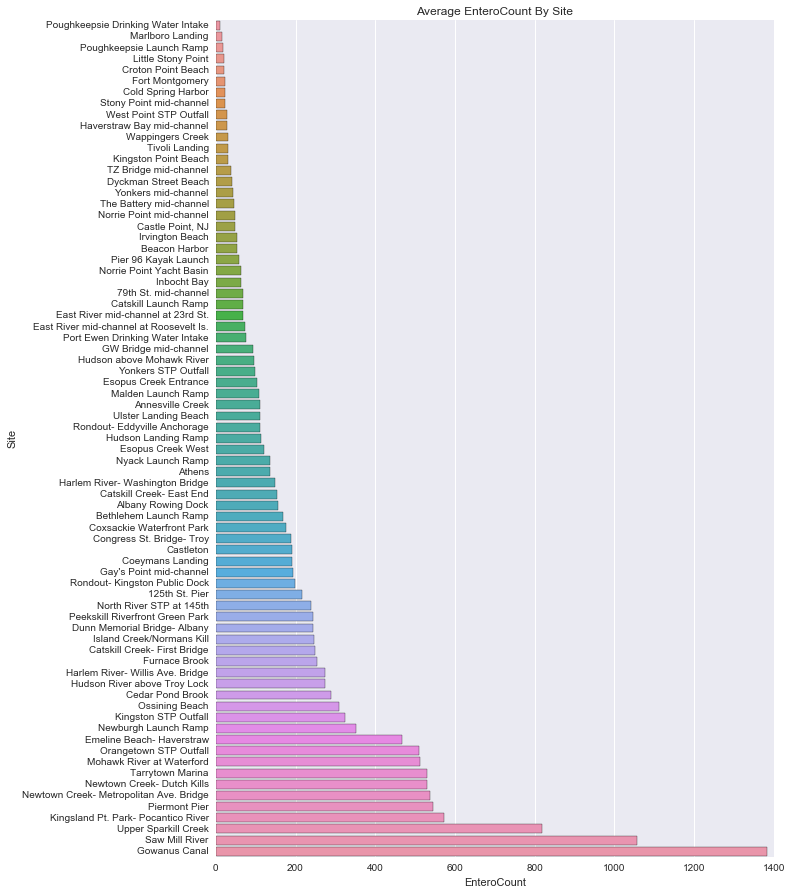

In [11]:
plt.figure(figsize = (10,15))
rf_bar = sns.barplot(data = rf_means, x ="EnteroCount", y="Site")
rf_bar.set_title("Average EnteroCount By Site")
rf_bar.set(xlabel = "EnteroCount")

### 2. The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.

Below are the 10 most visited sites and the 10 least visited.

In [12]:
rf_sc = riverkeeper[['Site', 'SampleCount']]
rf_sc = rf_sc.groupby('Site').max().sort_values(by = 'SampleCount', ascending = False)
rf_sc.to_csv('samplecount.csv')
rf_sc = pd.read_csv('samplecount.csv')
rf_sc.head(10)

,Site,SampleCount
0,Piermont Pier,187
1,Upper Sparkill Creek,165
2,125th St. Pier,66
3,Nyack Launch Ramp,61
4,Newtown Creek- Dutch Kills,57
5,TZ Bridge mid-channel,57
6,Orangetown STP Outfall,57
7,Newtown Creek- Metropolitan Ave. Bridge,57
8,Yonkers mid-channel,52
9,Yonkers STP Outfall,51


In [13]:
rf_sc.tail(10)

,Site,SampleCount
65,Athens,35
66,Coxsackie Waterfront Park,35
67,Cold Spring Harbor,35
68,Hudson above Mohawk River,35
69,Castleton,35
70,Wappingers Creek,35
71,Mohawk River at Waterford,35
72,Marlboro Landing,35
73,Island Creek/Normans Kill,35
74,Tarrytown Marina,27


We can visualize the total distribution of sample counts.

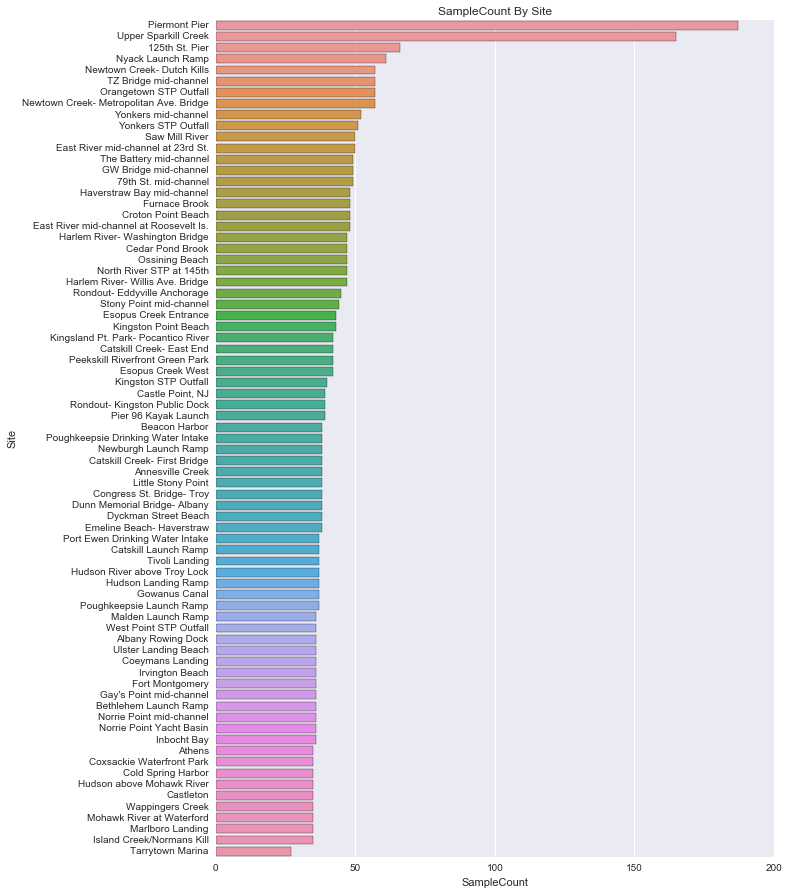

In [14]:
plt.figure(figsize = (10,15))
rf_bar = sns.barplot(data = rf_sc, x ="SampleCount", y="Site")
rf_bar.set_title("SampleCount By Site")
rf_bar.set(xlabel = "SampleCount")

And now to find the average gap between testing, I can find the first testing date, the last testing date, and then average using the total number of tests. This could be done with lag() as well, but it was causing issues.

In [15]:
rf_dates = riverkeeper[['Site', 'Date']]
rf_dates_min = rf_dates.groupby('Site').min()
rf_dates_max = rf_dates.groupby('Site').max()
rf_sc = riverkeeper[['Site', 'SampleCount']]
rf_sc = rf_sc.groupby('Site').max()
rf_dates_sc = pd.concat([rf_dates_min, rf_dates_max, rf_sc], axis = 2)
rf_dates_sc.columns = ['Oldest', 'Newest', 'SampleCount']
rf_dates_sc['AvgDaysBetween'] = (rf_dates_sc['Newest'] - rf_dates_sc['Oldest']) / rf_dates_sc['SampleCount']
rf_dates_sc['AvgDaysBetween'] = pd.to_timedelta(rf_dates_sc['AvgDaysBetween']) / np.timedelta64(1,'D')

In [16]:
rf_dates_sc.to_csv('avgsampledist.csv')
rf_dates_sc = pd.read_csv('avgsampledist.csv')

Most days between:

In [17]:
rf_dates_sc.sort_values(by = 'AvgDaysBetween', ascending = False).head(10)

,Site,Oldest,Newest,SampleCount,AvgDaysBetween
66,Tarrytown Marina,2008-08-06,2013-10-17,27,70.296296
29,Gowanus Canal,2007-04-18,2013-10-16,37,64.135135
64,Stony Point mid-channel,2006-09-19,2013-10-17,44,58.750000
35,Hudson above Mohawk River,2008-05-22,2013-10-21,35,56.514286
45,Mohawk River at Waterford,2008-05-22,2013-10-21,35,56.514286
16,Coxsackie Waterfront Park,2008-06-18,2013-10-21,35,55.742857
4,Athens,2008-06-18,2013-10-21,35,55.742857
55,Peekskill Riverfront Green Park,2007-05-21,2013-10-17,42,55.738095
44,Marlboro Landing,2008-06-17,2013-10-19,35,55.714286
71,Wappingers Creek,2008-06-17,2013-10-19,35,55.714286


Least days between:

In [18]:
rf_dates_sc.sort_values(by = 'AvgDaysBetween').head(10)

,Site,Oldest,Newest,SampleCount,AvgDaysBetween
70,Upper Sparkill Creek,2006-10-13,2012-12-10,165,13.636364
57,Piermont Pier,2006-10-17,2013-10-17,187,13.673797
52,Nyack Launch Ramp,2008-06-16,2013-10-17,61,31.950820
0,125th St. Pier,2006-10-02,2013-10-16,66,38.954545
61,Rondout- Eddyville Anchorage,2008-05-21,2013-10-19,45,43.933333
48,Newtown Creek- Metropolitan Ave. Bridge,2006-09-26,2013-10-16,57,45.210526
47,Newtown Creek- Dutch Kills,2006-09-26,2013-10-16,57,45.210526
65,TZ Bridge mid-channel,2006-09-26,2013-10-17,57,45.228070
53,Orangetown STP Outfall,2006-09-26,2013-10-17,57,45.228070
39,Kingsland Pt. Park- Pocantico River,2008-07-20,2013-10-17,42,45.595238


Without much surprise the few areas with an extremely high amount of testing had the fewest time between tests. However, most other samplecount sizes varied in time between tests, meaning that some sites could be newer than others, so even though they have less tests, it was done in a shorter amount of time.

Now to visualize 10 random sites for how often they are sampled. This would be simple enough to do with any amount of sites that you would like. Simply change the sample(10) to any number.

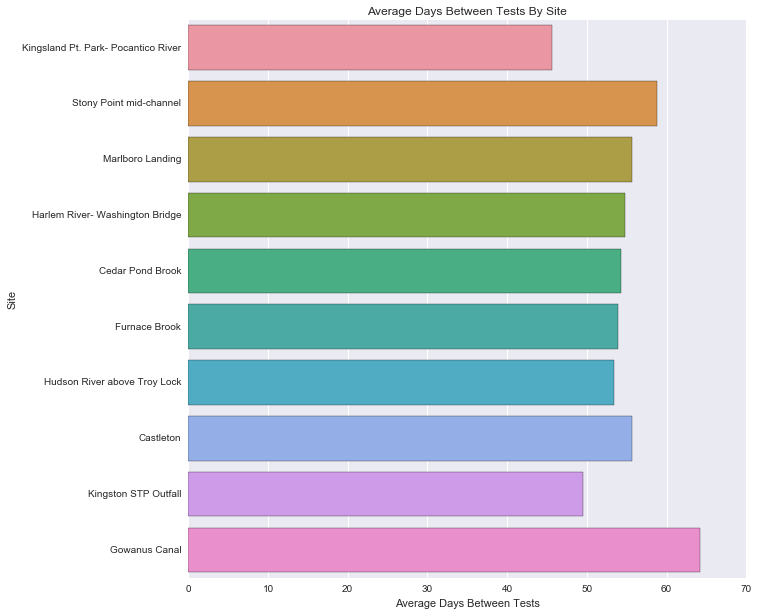

In [19]:
# pick 10 random rows to visualize
rf_dates_vis = rf_dates_sc.sample(10)

plt.figure(figsize = (10,10))
rf_bar = sns.barplot(data = rf_dates_vis, x ="AvgDaysBetween", y="Site")
rf_bar.set_title("Average Days Between Tests By Site")
rf_bar.set(xlabel = "Average Days Between Tests")

### 3. Is there a relationship between the amount of rain and water quality?  Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

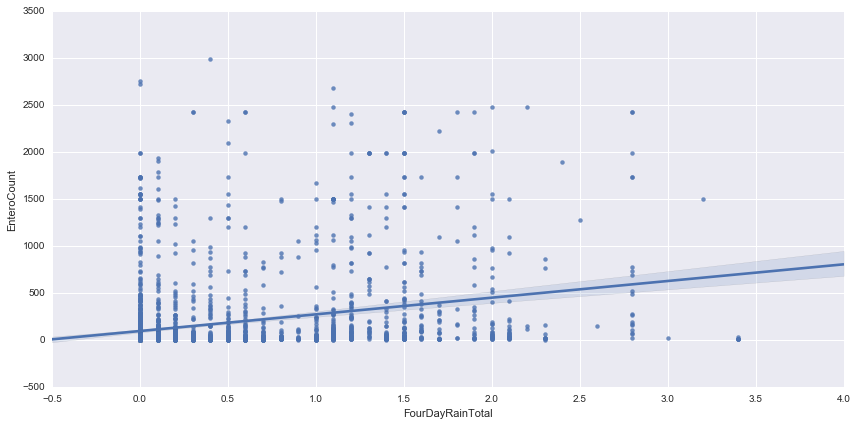

In [51]:
rf_rain = riverkeeper[['EnteroCount', 'FourDayRainTotal']]

# some trickery to remove outliers and nulls
rf_rain = rf_rain[~((rf_rain-rf_rain.mean()).abs()>3*rf_rain.std())]
rf_rain = rf_rain = rf_rain[pd.notnull(rf_rain)]

sns.lmplot(data = rf_rain, y = "EnteroCount", x = "FourDayRainTotal", size = 6, aspect = 2)

According to the fit above, a higher rain total generally correlates with a higher enterocount value. Visually, it is difficult to tell without the fit line.

Estimating the effect of rain on different sites without knowing the conditions of the location is difficult. There could easily be outside factors affecting an area that we cannot see. But, I'll display a few of the best and worst sites for entero along with their rain values.

The top 3 sites have the cleanest water, the bottom 3 have the dirtiest.

In [61]:
rf_rain = riverkeeper[['Site', 'EnteroCount', 'FourDayRainTotal']]
rf_rain = rf_rain.loc[rf_rain['Site'].isin(['Poughkeepsie Drinking Water Intake','Marlboro Landing', 'Poughkeepsie Launch Ramp',
                                           'Gowanus Canal', 'Saw Mill River', 'Upper Sparkill Creek'])]

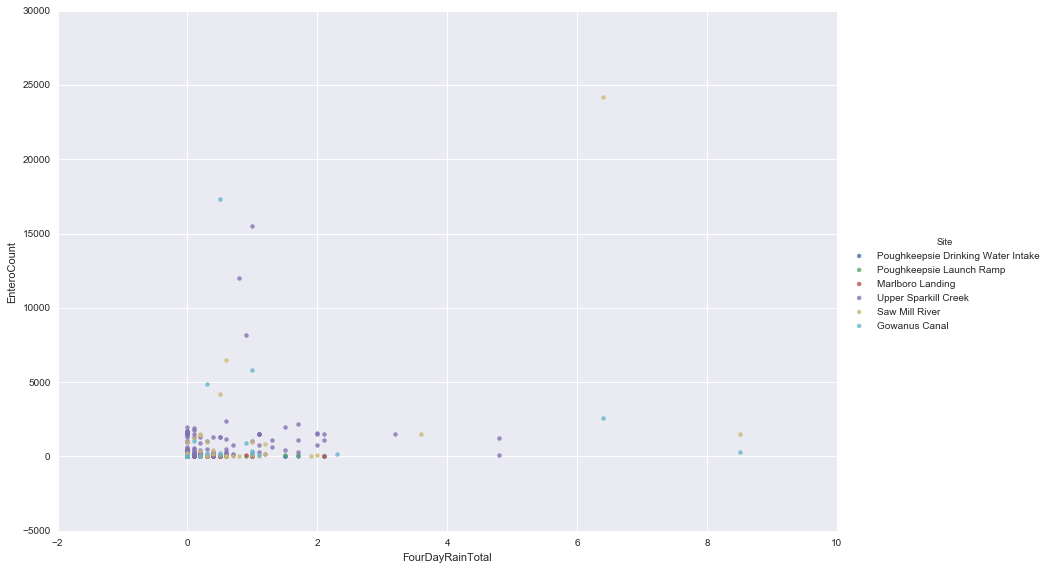

In [62]:
sns.lmplot('FourDayRainTotal', 'EnteroCount', data=rf_rain, hue='Site', fit_reg=False, size = 8, aspect = 1.5)